In [1]:
import numpy as np
import cv2
import math
import sys
import os
from matplotlib import pyplot as plt
from skimage.io import imread, imshow

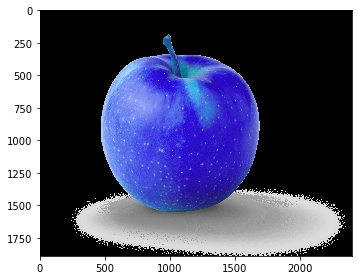

In [2]:
image = cv2.imread("apple_1.png")
imshow(image)

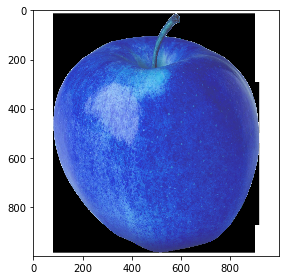

In [3]:
image_1 = cv2.imread("apple_2.png")
imshow(image_1)

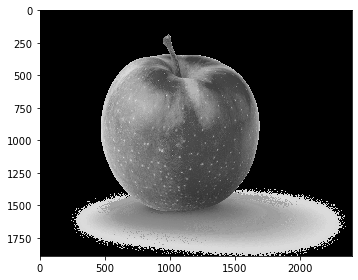

In [4]:
from PIL import Image
img = Image.open('apple_1.png').convert('LA')
img.save('greyscale.png')
imshow('greyscale.png')

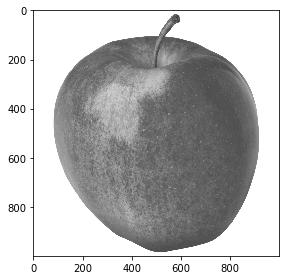

In [5]:
from PIL import Image
img = Image.open('apple_2.png').convert('LA')
img.save('greyscale_1.png')
imshow('greyscale_1.png')

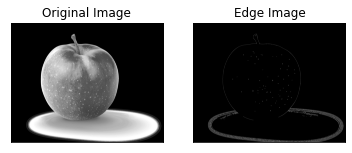

In [6]:
img = cv2.imread('greyscale.png',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

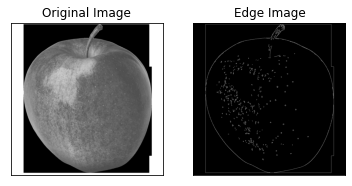

In [7]:
img = cv2.imread('greyscale_1.png',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
def grab_contours(cnts):
    if len(cnts) == 2:
        return cnts[0]
    elif len(cnts) == 3:
        return cnts[1]

image = cv2.imread("apple_2.png")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 120, 255, 1)
cv2.imshow("canny", edged)

cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = grab_contours(cnts)

contour_image = edged.copy()
area = 0

for c in cnts:
    area += cv2.contourArea(c) 
    cv2.drawContours(contour_image,[c], 0, (100,5,10), 3)

print(area)

60564.5


In [9]:
def grab_contours(cnts):
    if len(cnts) == 2:
        return cnts[0]
    elif len(cnts) == 3:
        return cnts[1]

image = cv2.imread("apple_1.png")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 120, 255, 1)
cv2.imshow("canny", edged)

cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = grab_contours(cnts)

contour_image = edged.copy()
area = 0

for c in cnts:
    area += cv2.contourArea(c) 
    cv2.drawContours(contour_image,[c], 0, (100,5,10), 3)

print(area)

6705.0


In [10]:
def ratio_of_area():
    a = float(60564.5)
    b = float(6705.5)
    c = float((a + b) / 2)
    return c
print(c)

[[[987 186]]

 [[986 187]]

 [[985 187]]

 ...

 [[992 187]]

 [[991 187]]

 [[990 186]]]


In [11]:
filename = 'greyscale_1.png'

img = cv2.imread(filename)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)

gray[dst>0.01*dst.max()] = 1
gray[dst<=0.01*dst.max()] = 0

from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(gray)
centers = km.cluster_centers_

from sklearn.metrics.pairwise import cosine_distances
print(cosine_distances(centers))

[[0.         0.73923033]
 [0.73923033 0.        ]]


In [12]:
import cv2
import numpy as np
img = cv2.imread('apple_1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)[1]
sz=thresh.shape
top=divmod(np.flatnonzero(thresh)[0], sz[0])[::-1]
botton=divmod(np.flatnonzero(thresh)[-1], sz[0])[::-1]
thresh=thresh.T
left=divmod(np.flatnonzero(thresh)[0], sz[1])
right=divmod(np.flatnonzero(thresh)[-1], sz[1])
print(left, right, top, botton, sep='\n')

(0, 0)
(1888, 2399)
(0, 0)
(1888, 2399)


In [13]:
from scipy.spatial import distance
def dist_eucli():
    a = [0, 0]
    b = [1888, 2399]
    c = float(distance.euclidean([0, 0], [1888, 2399]))
    return c
print(dist_eucli())

3052.825740195467


In [14]:
img = cv2.imread('apple_2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)[1]
sz=thresh.shape
top=divmod(np.flatnonzero(thresh)[0], sz[0])[::-1]
botton=divmod(np.flatnonzero(thresh)[-1], sz[0])[::-1]
thresh=thresh.T
left=divmod(np.flatnonzero(thresh)[0], sz[1])
right=divmod(np.flatnonzero(thresh)[-1], sz[1])
print(left, right, top, botton, sep='\n')

(82, 14)
(920, 873)
(82, 14)
(903, 985)


In [15]:
from scipy.spatial import distance
def dist_eucli():
    a = [82, 14]
    b = [920, 873]
    c = [82, 14]
    d = [903, 985]
    e = float(distance.euclidean([82, 14], [920, 873], [903, 985]))
    return e
print(dist_eucli())

36890.908324409684


In [16]:
import math
def dist_ratio():
    a = float(3052.825740195467)
    b = float(36890.908324409684)
    c = float((a + b) / 2)
    return c
print(dist_ratio())

19971.867032302576
